In [2]:
import matplotlib.pyplot as plt
import matplotlib

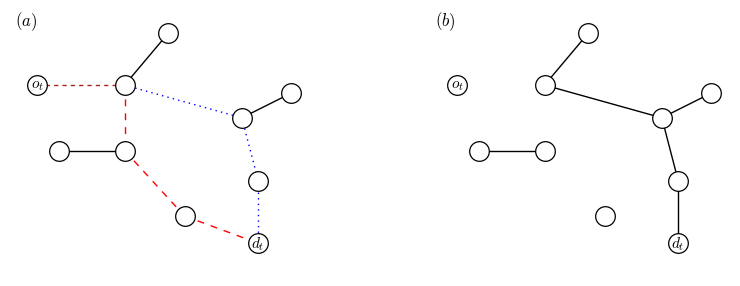

In [23]:
# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós ---
pos = {
    'ot': (-3, 1.5),
    'v1': (-1.4, 1.5),
    'v1a': (-0.6, 2.45),
    'b': (-1.4, 0.3),
    'y': (-2.6, 0.3),
    'c': (-0.3, -0.9),
    'e': (0.75, 0.9),
    'z': (1.65, 1.35),
    'f': (1.05, -0.25),
    'dt': (1.05, -1.4),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(
            x, y,
            s=200,
            marker='o',
            facecolor='white',
            edgecolor='black',
            linewidth=0.9,
            zorder=3
        )

        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

# Cria figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-3.5, 2.0)
    ax.set_ylim(-2.0, 2.7)

# Define as arestas
base   = [('v1', 'v1a'), ('b', 'y'), ('e', 'z')]
red    = [('ot', 'v1')]
purple = [('v1', 'b'), ('b', 'c'), ('c', 'dt')]      # agora ficarão vermelhas
orange = [('v1', 'e'), ('e', 'f'), ('f', 'dt')]      # agora ficarão azuis

# Painel (a)
for u, v in base + red + purple + orange:
    if (u, v) in red:
        style = {'linestyle': (0, (3, 3)), 'color': '#aa2323', 'linewidth': 1}
    elif (u, v) in purple:
        style = {'linestyle': (0, (5, 5)), 'color': 'red', 'linewidth': 1}
    elif (u, v) in orange:
        style = {'linestyle': (0, (1, 3)), 'color': 'blue', 'linewidth': 1}
    else:
        style = {'linestyle': 'solid', 'color': 'black', 'linewidth': 1}

    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        **style,
        zorder=1
    )

draw_nodes(ax1, pos)
ax1.text(-3.4, 2.6, r'$(a)$', fontsize=12)

# Painel (b): após remoção das arestas que agora são vermelhas
remaining = [
    ('v1', 'v1a'),
    ('v1', 'e'),
    ('e', 'z'),
    ('e', 'f'),
    ('f', 'dt'),
    ('b', 'y')
]

for u, v in remaining:
    ax2.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )

draw_nodes(ax2, pos)
ax2.text(-3.4, 2.6, r'$(b)$', fontsize=12)

# Salva a figura em PNG
file_path = 'spp_diagram_thin.png'
plt.savefig(file_path, dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()


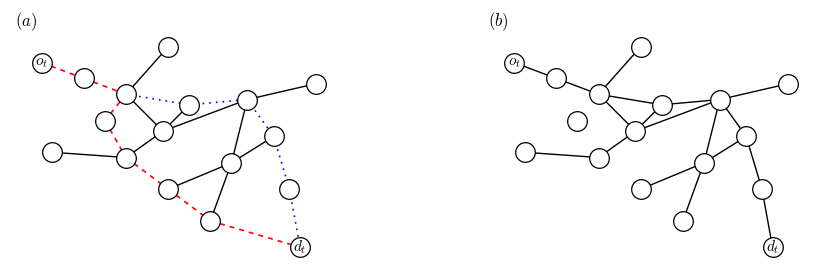

In [43]:
import matplotlib.pyplot as plt
import matplotlib

# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós (ajustadas para evitar cruzamentos) ---
pos = {
    'ot': (-3.4, 2.0),
    'v0': (-2.6, 1.7),
    'v1': (-1.8, 1.4),
    'v1a': (-1.0, 2.3),
    'p1': (-2.2, 0.9),
    'b': (-1.8, 0.2),
    'c1': (-1.0, -0.4),
    'c': (-0.2, -1.0),
    'e0': (-0.6, 1.2),
    'e': (0.5, 1.3),
    'r1': (1.0, 0.6),
    'f': (1.3, -0.4),
    'dt': (1.5, -1.5),
    'y': (-3.2, 0.3),
    'z': (1.8, 1.6),
    'k1': (-1.1, 0.7),
    'k2': (0.2, 0.1),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(
            x, y,
            s=200,
            marker='o',
            facecolor='white',
            edgecolor='black',
            linewidth=0.9,
            zorder=3
        )
        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

# Cria figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.6))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-4.0, 2.4)
    ax.set_ylim(-1.8, 2.8)

# --- Arestas base (sem duplicatas e sem cruzamentos) ---
base_edges = [
    ('v1', 'v1a'), ('b', 'y'), ('e', 'z'),
    ('v1', 'k1'), ('k1', 'e0'),
    ('b', 'k1'), ('k1', 'e'),
    ('c1', 'k2'), ('k2', 'r1'),
    ('k2', 'c'),
    ('e', 'k2'),
]

# Caminho vermelho (menor caminho)
red_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'p1'),
    ('p1', 'b'),
    ('b', 'c1'),
    ('c1', 'c'),
    ('c', 'dt'),
]

# Caminho azul (alternativo, começa desde o início também)
blue_path = [
    ('ot', 'v0'),     # sobrepõe o primeiro passo (visualmente paralelo)
    ('v0', 'v1'),     # sobrepõe o segundo passo
    ('v1', 'e0'),     # a partir daqui diverge
    ('e0', 'e'),
    ('e', 'r1'),
    ('r1', 'f'),
    ('f', 'dt'),
]


# Remove arestas duplicadas entre pares de nós
def unique_edges(edges):
    seen = set()
    unique = []
    for u, v in edges:
        key = tuple(sorted([u, v]))
        if key not in seen:
            unique.append((u, v))
            seen.add(key)
    return unique

# Painel (a)
for u, v in unique_edges(base_edges + red_path + blue_path):
    if (u, v) in red_path:
        style = {'linestyle': (0, (3, 3)), 'color': 'red', 'linewidth': 1.2}
    elif (u, v) in blue_path:
        style = {'linestyle': (0, (1, 3)), 'color': 'blue', 'linewidth': 1.2}
    else:
        style = {'linestyle': 'solid', 'color': 'black', 'linewidth': 1}
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        **style,
        zorder=1
    )

draw_nodes(ax1, pos)
ax1.text(-3.9, 2.7, r'$(a)$', fontsize=12)

# Painel (b): remove arestas do menor caminho
remaining_edges = unique_edges(base_edges + blue_path)

for u, v in remaining_edges:
    ax2.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )

draw_nodes(ax2, pos)
ax2.text(-3.9, 2.7, r'$(b)$', fontsize=12)

plt.savefig("spp_diagram_final_clean.png", dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()

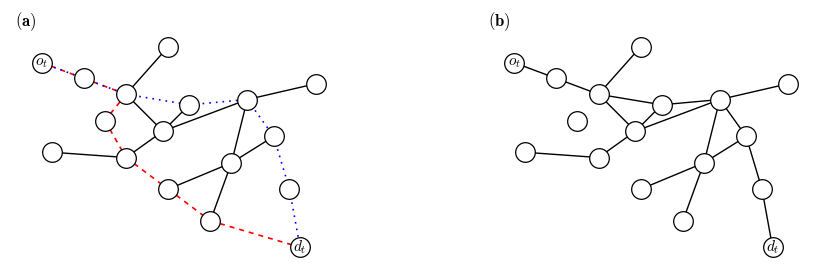

In [46]:
import matplotlib.pyplot as plt
import matplotlib

# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós (ajustadas para evitar cruzamentos) ---
pos = {
    'ot': (-3.4, 2.0),
    'v0': (-2.6, 1.7),
    'v1': (-1.8, 1.4),
    'v1a': (-1.0, 2.3),
    'p1': (-2.2, 0.9),
    'b': (-1.8, 0.2),
    'c1': (-1.0, -0.4),
    'c': (-0.2, -1.0),
    'e0': (-0.6, 1.2),
    'e': (0.5, 1.3),
    'r1': (1.0, 0.6),
    'f': (1.3, -0.4),
    'dt': (1.5, -1.5),
    'y': (-3.2, 0.3),
    'z': (1.8, 1.6),
    'k1': (-1.1, 0.7),
    'k2': (0.2, 0.1),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(
            x, y,
            s=200,
            marker='o',
            facecolor='white',
            edgecolor='black',
            linewidth=0.9,
            zorder=3
        )
        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

# Cria figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.6))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-4.0, 2.4)
    ax.set_ylim(-1.8, 2.8)

# --- Arestas base (estrutura do grafo) ---
base_edges = [
    ('v1', 'v1a'), ('b', 'y'), ('e', 'z'),
    ('v1', 'k1'), ('k1', 'e0'),
    ('b', 'k1'), ('k1', 'e'),
    ('c1', 'k2'), ('k2', 'r1'),
    ('k2', 'c'),
    ('e', 'k2'),
]

# Caminho vermelho (menor caminho)
red_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'p1'),
    ('p1', 'b'),
    ('b', 'c1'),
    ('c1', 'c'),
    ('c', 'dt'),
]

# Caminho azul (alternativo, começa desde o início também)
blue_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'e0'),
    ('e0', 'e'),
    ('e', 'r1'),
    ('r1', 'f'),
    ('f', 'dt'),
]

# Função para remover duplicatas nas arestas estruturais
def unique_edges(edges):
    seen = set()
    unique = []
    for u, v in edges:
        key = tuple(sorted([u, v]))
        if key not in seen:
            unique.append((u, v))
            seen.add(key)
    return unique

# ---------------- Painel (a) ----------------
# 1) Desenha a estrutura base em preto
for u, v in unique_edges(base_edges):
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )

# 2) Desenha o caminho vermelho por cima
for u, v in red_path:
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        linestyle=(0, (3, 3)),
        color='red',
        linewidth=1.2,
        zorder=2
    )

# 3) Desenha o caminho azul por cima
for u, v in blue_path:
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        linestyle=(0, (1, 3)),
        color='blue',
        linewidth=1.2,
        zorder=2
    )

draw_nodes(ax1, pos)
ax1.text(-3.9, 2.7, r'$\mathbf{(a)}$', fontsize=12)

# ---------------- Painel (b) ----------------
# Remove as arestas do menor caminho (vermelho)
remaining_edges = unique_edges(base_edges + blue_path)

for u, v in remaining_edges:
    ax2.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )

draw_nodes(ax2, pos)
ax2.text(-3.9, 2.7, r'$\mathbf{(b)}$', fontsize=12)

plt.savefig("spp_diagram_final_clean.png", dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()


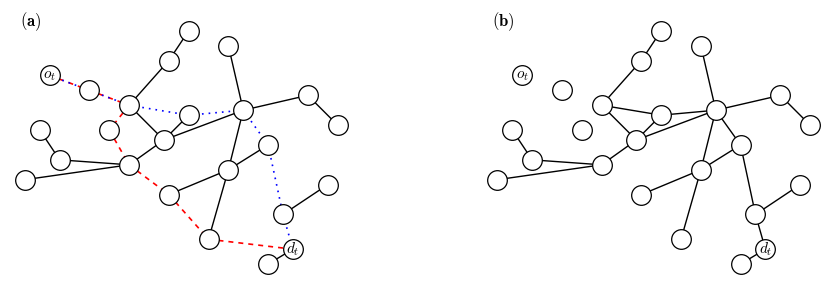

In [24]:
import matplotlib.pyplot as plt
import matplotlib

# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós (cluster central + ramos periféricos) ---
pos = {
    'ot': (-3.4, 2.0),
    'v0': (-2.6, 1.7),
    'v1': (-1.8, 1.4),
    'v1a': (-1.0, 2.3),
    'p1': (-2.2, 0.9),
    'b': (-1.8, 0.2),
    'c1': (-1.0, -0.4),
    'c': (-0.2, -1.3),
    'e0': (-0.6, 1.2),
    'e': (0.5, 1.3),
    'r1': (1.0, 0.6),
    'f': (1.3, -0.8),
    'dt': (1.5, -1.5),
    'y': (-3.2, 0.3),
    'z': (1.8, 1.6),
    'k1': (-1.1, 0.7),
    'k2': (0.2, 0.1),

    # ramos periféricos (novos vértices fora do cluster)
    't1': (-0.6, 2.9),
    't2': (0.2, 2.6),
    'l1': (-3.6, 0.9),
    'l2': (-3.9, -0.1),
    'r2': (2.4, 1.0),
    'r3': (2.2, -0.2),
    'b3': (1.0, -1.8),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(
            x, y,
            s=200,
            marker='o',
            facecolor='white',
            edgecolor='black',
            linewidth=0.9,
            zorder=3
        )
        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

# Cria figura e eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.8))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-4.2, 2.6)
    ax.set_ylim(-2.0, 3.1)

# --- Arestas base (estrutura do grafo) ---
base_edges = [
    ('v1', 'v1a'), ('b', 'y'), ('e', 'z'),
    ('v1', 'k1'), ('k1', 'e0'),
    ('b', 'k1'), ('k1', 'e'),
    ('c1', 'k2'), ('k2', 'r1'),
    ('k2', 'c'),
    ('e', 'k2'),

    # ramos periféricos (fora do cluster)
    ('v1a', 't1'), ('e', 't2'),
    ('y', 'l1'), ('b', 'l2'),
    ('z', 'r2'), ('f', 'r3'),
    ('dt', 'b3'),
]

# Caminho vermelho (menor caminho)
red_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'p1'),
    ('p1', 'b'),
    ('b', 'c1'),
    ('c1', 'c'),
    ('c', 'dt'),
]

# Caminho azul (alternativo)
blue_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'e0'),
    ('e0', 'e'),
    ('e', 'r1'),
    ('r1', 'f'),
    ('f', 'dt'),
]

# Função para remover duplicatas nas arestas estruturais
def unique_edges(edges):
    seen = set()
    unique = []
    for u, v in edges:
        key = tuple(sorted([u, v]))
        if key not in seen:
            unique.append((u, v))
            seen.add(key)
    return unique

# ---------------- Painel (a) ----------------
# Estrutura base em preto
for u, v in unique_edges(base_edges):
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )

# Caminho vermelho (por cima)
for u, v in red_path:
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        linestyle=(0, (3, 3)),
        color='red',
        linewidth=1.2,
        zorder=2
    )

# Caminho azul (por cima)
for u, v in blue_path:
    ax1.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        linestyle=(0, (1, 3)),
        color='blue',
        linewidth=1.2,
        zorder=2
    )

draw_nodes(ax1, pos)
ax1.text(-4.0, 3.0, r'$\mathbf{(a)}$', fontsize=12)

# ---------------- Painel (b) ----------------
# Remove as arestas do menor caminho (vermelho)
remaining_edges = unique_edges(base_edges + blue_path)

edges_to_remove_b = {('ot', 'v0'), ('v0', 'v1')}

for u, v in remaining_edges:
    if (u, v) in edges_to_remove_b or (v, u) in edges_to_remove_b:
        continue  # não desenha essas duas arestas no painel (b)

    ax2.plot(
        [pos[u][0], pos[v][0]],
        [pos[u][1], pos[v][1]],
        color='black',
        linewidth=1,
        zorder=1
    )
    
draw_nodes(ax2, pos)
ax2.text(-4.0, 3.0, r'$\mathbf{(b)}$', fontsize=12)

plt.savefig("spp_diagram_final_with_peripheral_nodes.png", dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()


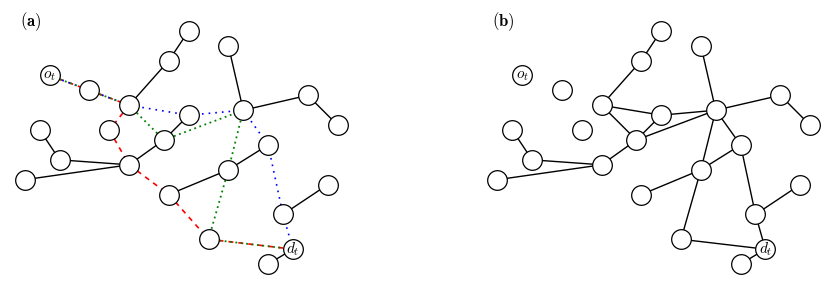

In [2]:
import matplotlib.pyplot as plt
import matplotlib

# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós (cluster central + ramos periféricos) ---
pos = {
    'ot': (-3.4, 2.0),
    'v0': (-2.6, 1.7),
    'v1': (-1.8, 1.4),
    'v1a': (-1.0, 2.3),
    'p1': (-2.2, 0.9),
    'b': (-1.8, 0.2),
    'c1': (-1.0, -0.4),
    'c': (-0.2, -1.3),
    'e0': (-0.6, 1.2),
    'e': (0.5, 1.3),
    'r1': (1.0, 0.6),
    'f': (1.3, -0.8),
    'dt': (1.5, -1.5),
    'y': (-3.2, 0.3),
    'z': (1.8, 1.6),
    'k1': (-1.1, 0.7),
    'k2': (0.2, 0.1),

    't1': (-0.6, 2.9),
    't2': (0.2, 2.6),
    'l1': (-3.6, 0.9),
    'l2': (-3.9, -0.1),
    'r2': (2.4, 1.0),
    'r3': (2.2, -0.2),
    'b3': (1.0, -1.8),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(x, y, s=200, marker='o', facecolor='white',
                   edgecolor='black', linewidth=0.9, zorder=3)
        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.8))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-4.2, 2.6)
    ax.set_ylim(-2.0, 3.1)

base_edges = [
    ('v1', 'v1a'), ('b', 'y'), ('e', 'z'),
    ('v1', 'k1'), ('k1', 'e0'),
    ('b', 'k1'), ('k1', 'e'),
    ('c1', 'k2'), ('k2', 'r1'),
    ('k2', 'c'),
    ('e', 'k2'),
    ('v1a', 't1'), ('e', 't2'),
    ('y', 'l1'), ('b', 'l2'),
    ('z', 'r2'), ('f', 'r3'),
    ('dt', 'b3'),
]

red_path = [
    ('ot', 'v0'), ('v0', 'v1'), ('v1', 'p1'),
    ('p1', 'b'), ('b', 'c1'), ('c1', 'c'), ('c', 'dt'),
]

blue_path = [
    ('ot', 'v0'), ('v0', 'v1'), ('v1', 'e0'),
    ('e0', 'e'), ('e', 'r1'), ('r1', 'f'), ('f', 'dt'),
]

green_path = [
    ('ot', 'v0'), ('v0', 'v1'), ('v1', 'k1'),
    ('k1', 'e'), ('e', 'k2'), ('k2', 'c'), ('c', 'dt'),
]

def unique_edges(edges):
    seen = set()
    out = []
    for u, v in edges:
        k = tuple(sorted((u, v)))
        if k not in seen:
            seen.add(k)
            out.append((u, v))
    return out

# conjunto de arestas coloridas (para remover do preto)
colored_edges = set(tuple(sorted(e)) for e in (red_path + blue_path + green_path))

# ---------- Painel (a) ----------
for u, v in unique_edges(base_edges):
    if tuple(sorted((u, v))) in colored_edges:
        continue  # não desenha aresta preta se ela faz parte de algum caminho colorido

    ax1.plot([pos[u][0], pos[v][0]],
             [pos[u][1], pos[v][1]],
             color='black', linewidth=1, zorder=1)

# caminhos
for path, style, color, lw in [
    (red_path,   (0, (3, 3)), 'red',   1.2),
    (blue_path,  (0, (1, 3)), 'blue',  1.2),
    (green_path, (0, (1, 2)), 'green', 1.3),
]:
    for u, v in path:
        ax1.plot([pos[u][0], pos[v][0]],
                 [pos[u][1], pos[v][1]],
                 linestyle=style, color=color, linewidth=lw, zorder=2)

draw_nodes(ax1, pos)
ax1.text(-4.0, 3.0, r'$\mathbf{(a)}$', fontsize=12)

# ---------- Painel (b) ----------
remaining_edges = unique_edges(base_edges + blue_path + green_path)

edges_to_remove_b = {('ot', 'v0'), ('v0', 'v1')}

for u, v in remaining_edges:
    if (u, v) in edges_to_remove_b or (v, u) in edges_to_remove_b:
        continue

    ax2.plot([pos[u][0], pos[v][0]],
             [pos[u][1], pos[v][1]],
             color='black', linewidth=1, zorder=1)

draw_nodes(ax2, pos)
ax2.text(-4.0, 3.0, r'$\mathbf{(b)}$', fontsize=12)

plt.savefig("spp_diagram_final_three_paths_clean.png", dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()


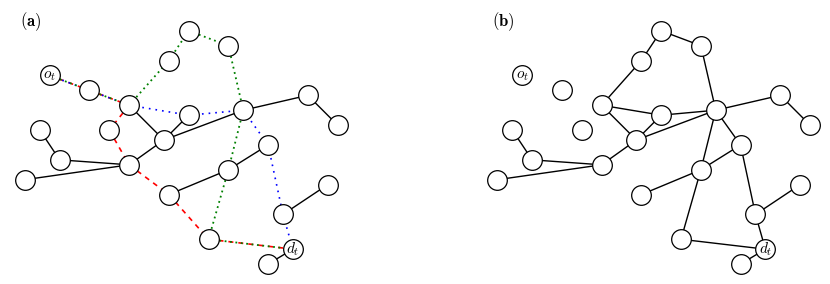

In [1]:
import matplotlib.pyplot as plt
import matplotlib

# Configuração para usar mathtext (Computer Modern)
matplotlib.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.size": 10,
})

# --- Coordenadas dos nós (cluster central + ramos periféricos) ---
pos = {
    'ot': (-3.4, 2.0),
    'v0': (-2.6, 1.7),
    'v1': (-1.8, 1.4),
    'v1a': (-1.0, 2.3),
    'p1': (-2.2, 0.9),
    'b': (-1.8, 0.2),
    'c1': (-1.0, -0.4),
    'c': (-0.2, -1.3),
    'e0': (-0.6, 1.2),
    'e': (0.5, 1.3),
    'r1': (1.0, 0.6),
    'f': (1.3, -0.8),
    'dt': (1.5, -1.5),
    'y': (-3.2, 0.3),
    'z': (1.8, 1.6),
    'k1': (-1.1, 0.7),
    'k2': (0.2, 0.1),

    # ramos periféricos
    't1': (-0.6, 2.9),
    't2': (0.2, 2.6),
    'l1': (-3.6, 0.9),
    'l2': (-3.9, -0.1),
    'r2': (2.4, 1.0),
    'r3': (2.2, -0.2),
    'b3': (1.0, -1.8),
}

def draw_nodes(ax, pos):
    for key, (x, y) in pos.items():
        ax.scatter(x, y, s=200, marker='o', facecolor='white',
                   edgecolor='black', linewidth=0.9, zorder=3)
        if key == 'ot':
            ax.text(x, y, r'$o_t$', ha='center', va='center', fontsize=11, zorder=4)
        elif key == 'dt':
            ax.text(x, y, r'$d_t$', ha='center', va='center', fontsize=11, zorder=4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.8))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4)

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-4.2, 2.6)
    ax.set_ylim(-2.0, 3.1)

# --- Estrutura do grafo ---
base_edges = [
    ('v1', 'v1a'), ('b', 'y'), ('e', 'z'),
    ('v1', 'k1'), ('k1', 'e0'),
    ('b', 'k1'), ('k1', 'e'),
    ('c1', 'k2'), ('k2', 'r1'),
    ('k2', 'c'),
    ('e', 'k2'),
    ('v1a', 't1'), ('e', 't2'),
    ('y', 'l1'), ('b', 'l2'),
    ('z', 'r2'), ('f', 'r3'),
    ('dt', 'b3'),
]

# Caminhos
red_path = [
    ('ot', 'v0'), ('v0', 'v1'), ('v1', 'p1'),
    ('p1', 'b'), ('b', 'c1'), ('c1', 'c'), ('c', 'dt'),
]

blue_path = [
    ('ot', 'v0'), ('v0', 'v1'), ('v1', 'e0'),
    ('e0', 'e'), ('e', 'r1'), ('r1', 'f'), ('f', 'dt'),
]

# Caminho verde mais longo (9 passos)
green_path = [
    ('ot', 'v0'),
    ('v0', 'v1'),
    ('v1', 'v1a'),
    ('v1a', 't1'),
    ('t1', 't2'),
    ('t2', 'e'),
    ('e', 'k2'),
    ('k2', 'c'),
    ('c', 'dt'),
]

def unique_edges(edges):
    seen = set()
    out = []
    for u, v in edges:
        k = tuple(sorted((u, v)))
        if k not in seen:
            seen.add(k)
            out.append((u, v))
    return out

# arestas pertencentes a qualquer caminho colorido
colored_edges = set(tuple(sorted(e)) for e in (red_path + blue_path + green_path))

# ---------- Painel (a) ----------
# estrutura base (exceto onde passam caminhos coloridos)
for u, v in unique_edges(base_edges):
    if tuple(sorted((u, v))) in colored_edges:
        continue

    ax1.plot([pos[u][0], pos[v][0]],
             [pos[u][1], pos[v][1]],
             color='black', linewidth=1, zorder=1)

# desenha caminhos
for path, style, color, lw in [
    (red_path,   (0, (3, 3)), 'red',   1.2),
    (blue_path,  (0, (1, 3)), 'blue',  1.2),
    (green_path, (0, (1, 2)), 'green', 1.3),
]:
    for u, v in path:
        ax1.plot([pos[u][0], pos[v][0]],
                 [pos[u][1], pos[v][1]],
                 linestyle=style, color=color, linewidth=lw, zorder=2)

draw_nodes(ax1, pos)
ax1.text(-4.0, 3.0, r'$\mathbf{(a)}$', fontsize=12)

# ---------- Painel (b) ----------
remaining_edges = unique_edges(base_edges + blue_path + green_path)

edges_to_remove_b = {('ot', 'v0'), ('v0', 'v1')}

for u, v in remaining_edges:
    if (u, v) in edges_to_remove_b or (v, u) in edges_to_remove_b:
        continue

    ax2.plot([pos[u][0], pos[v][0]],
             [pos[u][1], pos[v][1]],
             color='black', linewidth=1, zorder=1)

draw_nodes(ax2, pos)
ax2.text(-4.0, 3.0, r'$\mathbf{(b)}$', fontsize=12)

plt.savefig("spp_diagram.png", dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()
